# Binary classification on breast cancer dataset
---
Guidelines:
Using the Breast Cancer dataset, perform the following techniques for binary classification:
* Logistic regression
* Random forest
* Support vector machines

## Initialization

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
%config InlineBackend.figure_format = "retina"

In [2]:
color_a1 = '#664c85'
color_a2 = '#5b92b6'
color_a3 = '#52d5bd'
color_a4 = '#eeeeee'
palette_a1 = 'mako'
palette_a2 = 'mako_r'

### Dataset information

In [3]:
# Loading dataset from `sklearn.datasets.load_breast_cancer`
data_raw_breastcancer = load_breast_cancer()

# Printing dataset information
print(f"Dataset keys: {data_raw_breastcancer.keys()}\n")
print(data_raw_breastcancer['DESCR'])

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest va

Making dataframe out of the raw data

In [4]:
df_breastcancer = pd.DataFrame(
    columns = data_raw_breastcancer['feature_names'],
    data = data_raw_breastcancer['data']
).assign(classification = data_raw_breastcancer['target'])

df_breastcancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Checking if there are duplicates in the dataframe as to avoid possible data leaks when training the data

In [5]:
df_breastcancer.duplicated().value_counts()

False    569
dtype: int64

Dataframe statistics

In [6]:
df_breastcancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Getting a correlation overview of the data's factors

In [7]:
def plot_heatmap(
    data, cmap = None, height: int = 10, 
    linewidth: int = 1, title: str = None, subtitle: str = None
) -> sns.heatmap:

    cmap = sns.color_palette(palette = palette_a2, as_cmap = True) if cmap is None else cmap
    title = ' ' if title is None else title
    subtitle = ' ' if subtitle is None else subtitle

    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})

    g = sns.heatmap(
        data = data, cmap = cmap, linewidths = linewidth,
        cbar_kws = dict(location = 'right'), )

    g.set_xlabel("".join([(' '), ('\n'*4), (' ')]))
    g.set_ylabel("".join([(' '), ('\n'*4), (' ')]))

    g.set_xticklabels([tick_label.get_text().title() for tick_label in g.get_xticklabels()])
    g.set_yticklabels([tick_label.get_text().title() for tick_label in g.get_yticklabels()])

    g.set_title(
        "".join([(' '), ('\n'*4), (title), ('\n'*2)]).upper(),
        loc = 'left', fontdict = dict(fontsize = 14, fontweight = 'bold'),)

    plt.text(
        s = f'{subtitle}', x = 0, y = -1.5,
        alpha = 0.5, horizontalalignment = 'left', verticalalignment = 'top',)

    plt.text(
        s = ' ', x = 1.2, y = 1,
        transform = g.transAxes, )

    return g

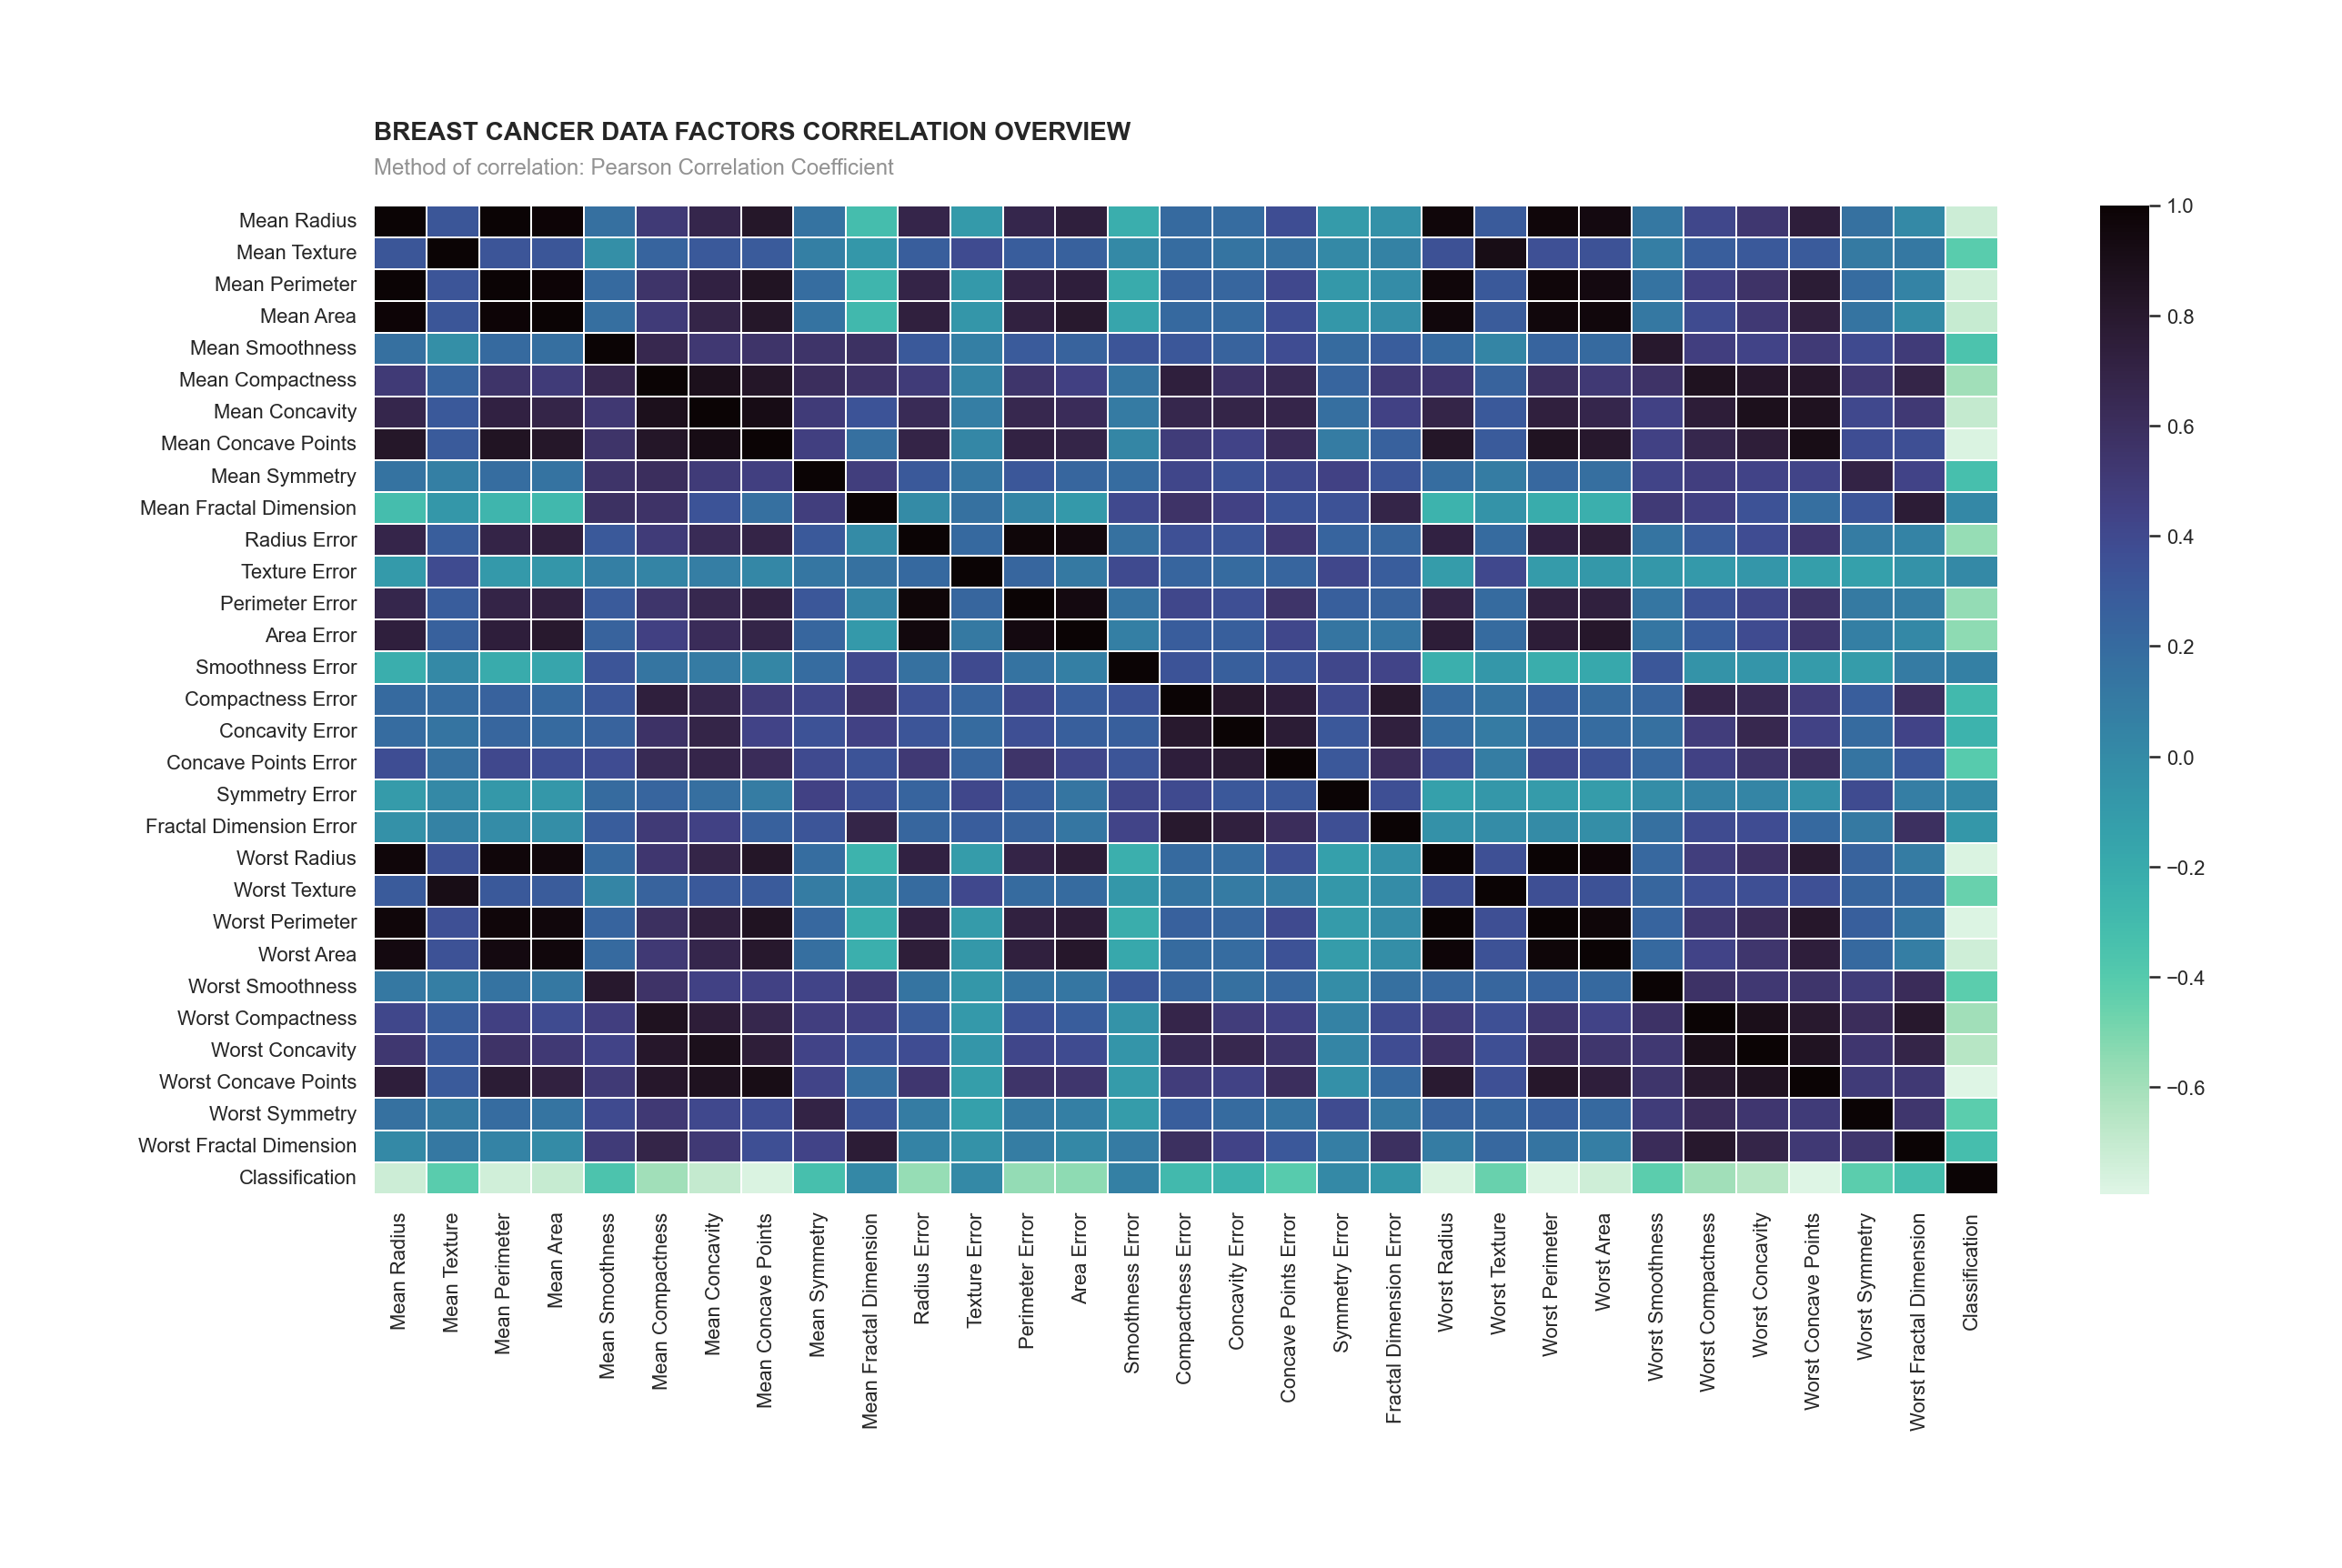

In [45]:
plot_heatmap(
    data = df_breastcancer.corr(),
    title = 'Breast Cancer Data Factors Correlation Overview',
    subtitle = 'Method of correlation: Pearson Correlation Coefficient'
);

Target or variable y classification count

In [46]:
def plot_countplot(
    data = None, x: str = None, y: str = None, 
    palette = palette_a1, height: int = 5, title = None, 
    subtitle = None, description = None
) -> sns.countplot:

    palette = palette_a1 if palette is None else palette
    title = ' ' if title is None else title
    subtitle = ' ' if subtitle is None else subtitle
    description = ' ' if description is None else description

    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})

    g = sns.countplot(
        data = data, y = y, x = x,
        palette = palette_a1,)

    g.set_ylabel("".join([(' '), ('\n'*3)]))
    g.set_xlabel("".join([(' '), ('\n'*5)]))

    g.set_title(
        "".join([(' '), ('\n'*4), (title), ('\n'*2)]).upper(),        
        loc = 'left', fontdict = dict(fontsize = 13, fontweight = 'bold'),)

    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(fontsize = 12.5, fontweight = 'medium'), )

    plt.text(
        s = f'{subtitle}', x = 0, y = 1.05,
        alpha = 0.5, horizontalalignment = 'left',transform = g.transAxes, )

    plt.text(
        s = f'{description}', x = 0, y = -.18,
        alpha = 0.5, verticalalignment = 'baseline',horizontalalignment = 'left',
        transform = g.transAxes, )

    g.bar_label(
        container = g.containers[0], padding = 10,)

    plt.text(
        s = ' ', x = 1.08, y = 1,
        transform = g.transAxes, )

    sns.despine()

    return g

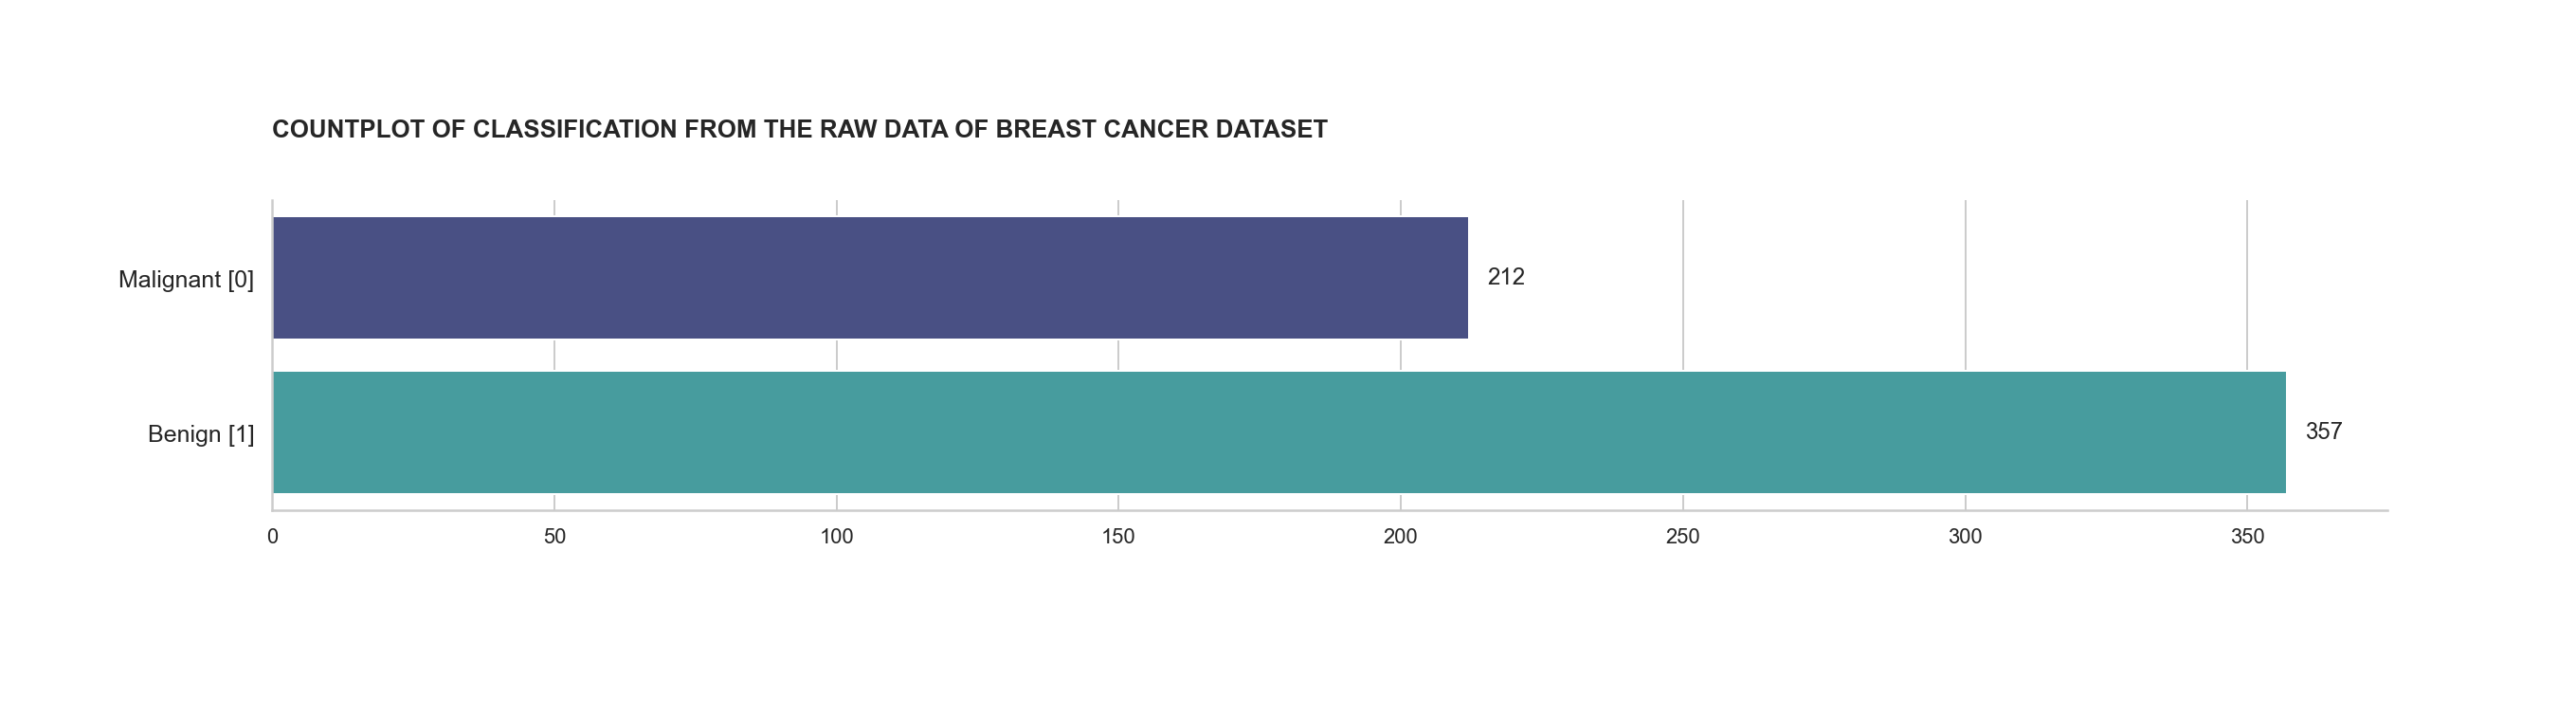

In [47]:
plot_countplot(
    y = df_breastcancer.iloc[:, -1].astype(str).replace({"0": f"{data_raw_breastcancer['target_names'][0].title()} [0]", "1": f"{data_raw_breastcancer['target_names'][1].title()} [1]"}),
    title = 'Countplot of classification from the raw data of breast cancer dataset',
    height = 3,
);

Saving the dataframe as csv and the raw data as binary file to local machine

In [11]:
# Saving dataframe to local machine as csv
df_breastcancer.to_csv(r'data/data_breastcancer.csv')

# Saving dataset to local machine as a binary file
with open(r'data/data_breastcancer.bin', 'wb') as file:
    pickle.dump(data_raw_breastcancer, file)

### Primary variables initialization

In [12]:
# Getting the X and y variable to use
var_X = df_breastcancer.iloc[:, :-1]
var_y = df_breastcancer.iloc[:, -1]
var_X_raw = data_raw_breastcancer['data']
var_y_raw = data_raw_breastcancer['target']

Splitting the dataset to train and test data

In [13]:
var_X_train, var_X_test, var_y_train, var_y_test = train_test_split(
    var_X, var_y, stratify = var_y,
    random_state = 0, )

Getting split details

In [14]:
print("Split size details")
print(f"X-original size: {len(var_X)}, X-train: {len(var_X_train)}, X-test: {len(var_X_test)}")
print(f"y-original size: {len(var_y)}, y-train: {len(var_y_train)}, y-test: {len(var_y_test)}")
print("Split percentage")
print(f"Train: {round(len(var_X_train)/len(var_X) * 100)}%")
print(f"Test: {round(len(var_X_test)/len(var_X) * 100)}%")

Split size details
X-original size: 569, X-train: 426, X-test: 143
y-original size: 569, y-train: 426, y-test: 143
Split percentage
Train: 75%
Test: 25%


#### Data preview

##### X variable

Variable X data - original

In [15]:
var_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Variable X data - training

In [16]:
var_X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
74,12.310,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.022720,0.1720,0.05914,...,14.110,23.21,89.71,611.1,0.1176,0.1843,0.17030,0.08660,0.2618,0.07609
201,17.540,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,0.1506,0.05491,...,20.420,25.84,139.50,1239.0,0.1381,0.3420,0.35080,0.19390,0.2928,0.07867
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.017800,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.53810,0.07879,0.3322,0.14860
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.1128,0.1346,0.01120,0.02500,0.2651,0.08385


Variable X data - test

In [17]:
var_X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,...,15.85,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782
517,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,23.73,25.23,160.50,1646.0,0.1417,0.3309,0.4185,0.16130,0.2549,0.09136
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.1309,0.2327,0.2544,0.14890,0.3251,0.07625
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211
274,17.930,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,20.92,34.69,135.10,1320.0,0.1315,0.1806,0.2080,0.11360,0.2504,0.07948


##### y variable

Variable y data - original

In [18]:
var_y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64

Variable X data - training

In [19]:
var_y_train.head()

74     1
201    0
303    1
151    1
306    1
Name: classification, dtype: int64

Variable X data - test

In [20]:
var_y_test.head()

532    1
517    0
492    0
459    1
274    0
Name: classification, dtype: int64

## Logistic regression

As logistic regression use gradient descent, scaling the data can help the model run faster and better

In [21]:
pipe_model_logreg = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C = 0.01)),])

Training the model

In [22]:
model_logreg = pipe_model_logreg.fit(var_X_train, var_y_train)

### Current model parameter and statistics

C or the regularization is currently set to 0.01 and penalty to l2

In [23]:
# Getting current model parameters and their values
model_logreg.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', LogisticRegression(C=0.01))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': LogisticRegression(C=0.01),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 0.01,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

Training set score

In [24]:
def get_trainingset_score(model):
    model_score = model.score(X = var_X_train, y = var_y_train)
    return model_score, f'{model_score * 100:.3f}%', f'Training set score: {model_score * 100:.3f}%'

get_trainingset_score(model_logreg)[2]

'Training set score: 95.305%'

Testing set score

In [25]:
def get_testingset_score(model):
    model_score = model.score(X = var_X_test, y = var_y_test)
    return model_score, f'{model_score * 100:.3f}%', f'Testing set score: {model_score * 100:.3f}%'

get_testingset_score(model_logreg)[2]

'Testing set score: 95.105%'

### Plotting classification result

Making a dataframe of actual value vs predicted value comparison

In [26]:
var_conf_matrix_labels = {
    'true positive': f"true {data_raw_breastcancer['target_names'][0]}",
    'false positive': f"false {data_raw_breastcancer['target_names'][0]}",
    'false negative': f"false {data_raw_breastcancer['target_names'][1]}",
    'true negative': f"true {data_raw_breastcancer['target_names'][1]}",
}

var_conf_matrix_labels

{'true positive': 'true malignant',
 'false positive': 'false malignant',
 'false negative': 'false benign',
 'true negative': 'true benign'}

In [27]:
def make_df_predictedvstrue(model, conf_matrix_labels = var_conf_matrix_labels):
    df = pd.DataFrame(dict(
        actual_value = var_y_test,
        predicted_value = model.predict(var_X_test)
    ))

    df['classification'] = df[['actual_value', 'predicted_value']].apply(
        lambda x: 
            f'{conf_matrix_labels["true positive"]}' if x['actual_value'] == 1 and x['predicted_value'] == 1 else
            f'{conf_matrix_labels["false positive"]}' if x['actual_value'] == 0 and x['predicted_value'] == 1 else
            f'{conf_matrix_labels["false negative"]}' if x['actual_value'] == 1 and x['predicted_value'] == 0 else
            f'{conf_matrix_labels["true negative"]}'
        , axis=1
    )

    return df

In [28]:
df_breastcancer_predictedvstrue_logreg = make_df_predictedvstrue(model = model_logreg)
df_breastcancer_predictedvstrue_logreg

,actual_value,predicted_value,classification
532,1,1,true malignant
517,0,0,true benign
492,0,0,true benign
459,1,1,true malignant
274,0,0,true benign
...,...,...,...
400,0,0,true benign
295,1,1,true malignant
132,0,0,true benign
296,1,1,true malignant


Plotting countplot result of classification

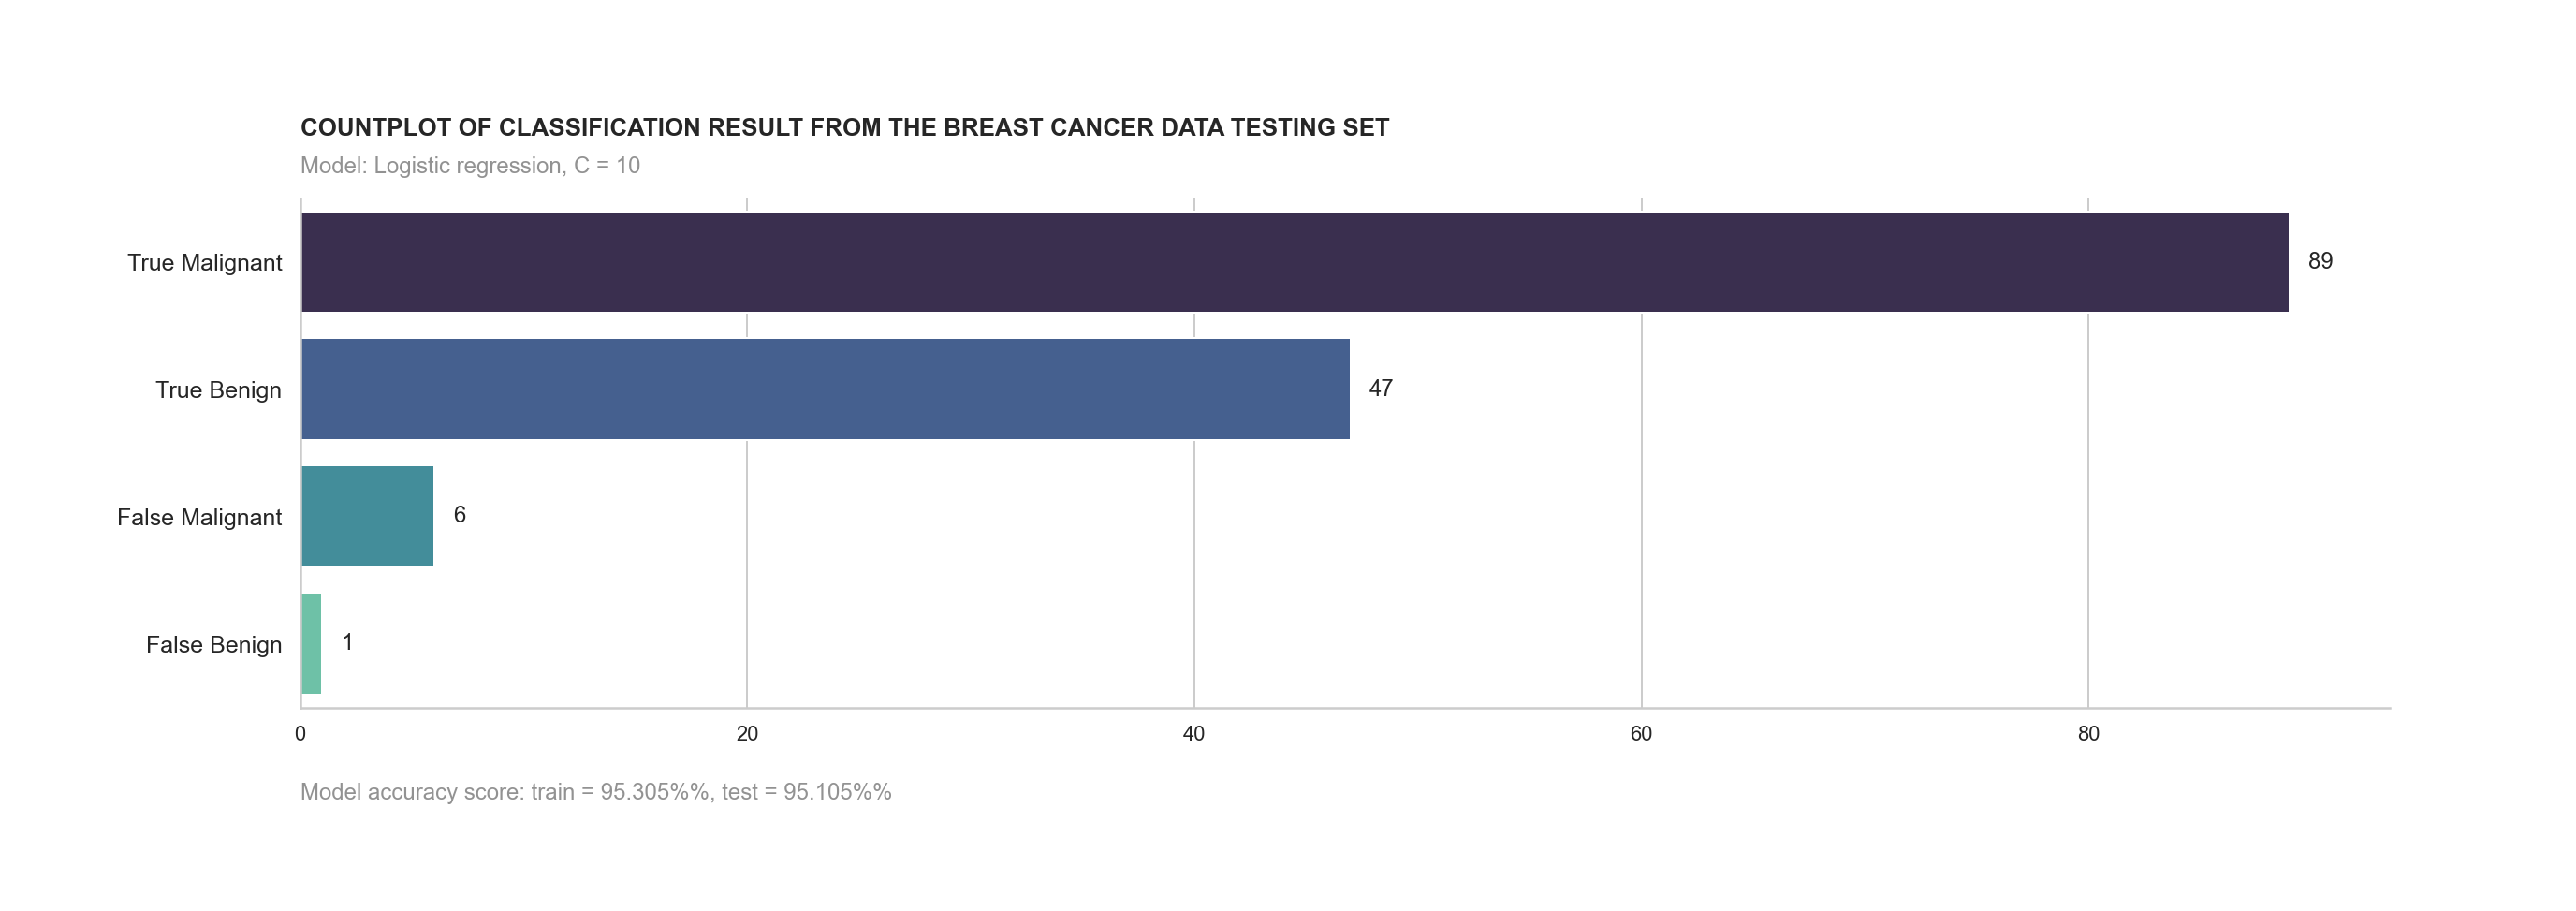

In [29]:
plot_countplot(
    data = df_breastcancer_predictedvstrue_logreg,
    y = 'classification',
    title = 'Countplot of classification result from the breast cancer data testing set',
    subtitle = 'Model: Logistic regression, C = 10',
    description = f'Model accuracy score: train = {get_trainingset_score(model = model_logreg)[1]}%, test = {get_testingset_score(model = model_logreg)[1]}%'
);

## Random forest

Training the model

In [30]:
model_rforestclf = RandomForestClassifier(random_state = 0, max_features='sqrt', n_estimators = 20, max_depth = 10).fit(var_X_train, var_y_train)

### Current model parameter and statistics

In [31]:
# Getting current model parameters and their values
model_rforestclf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Training set score

In [32]:
get_trainingset_score(model_rforestclf)[2]

'Training set score: 99.765%'

Testing set score

In [33]:
get_testingset_score(model_rforestclf)[2]

'Testing set score: 95.105%'

### Plotting classification result

Making a dataframe of actual value vs predicted value comparison

In [34]:
df_breastcancer_predictedvstrue_rforestclf = make_df_predictedvstrue(model = model_rforestclf)
df_breastcancer_predictedvstrue_rforestclf

,actual_value,predicted_value,classification
532,1,1,true malignant
517,0,0,true benign
492,0,0,true benign
459,1,1,true malignant
274,0,0,true benign
...,...,...,...
400,0,0,true benign
295,1,1,true malignant
132,0,0,true benign
296,1,1,true malignant


Plotting countplot result of classification

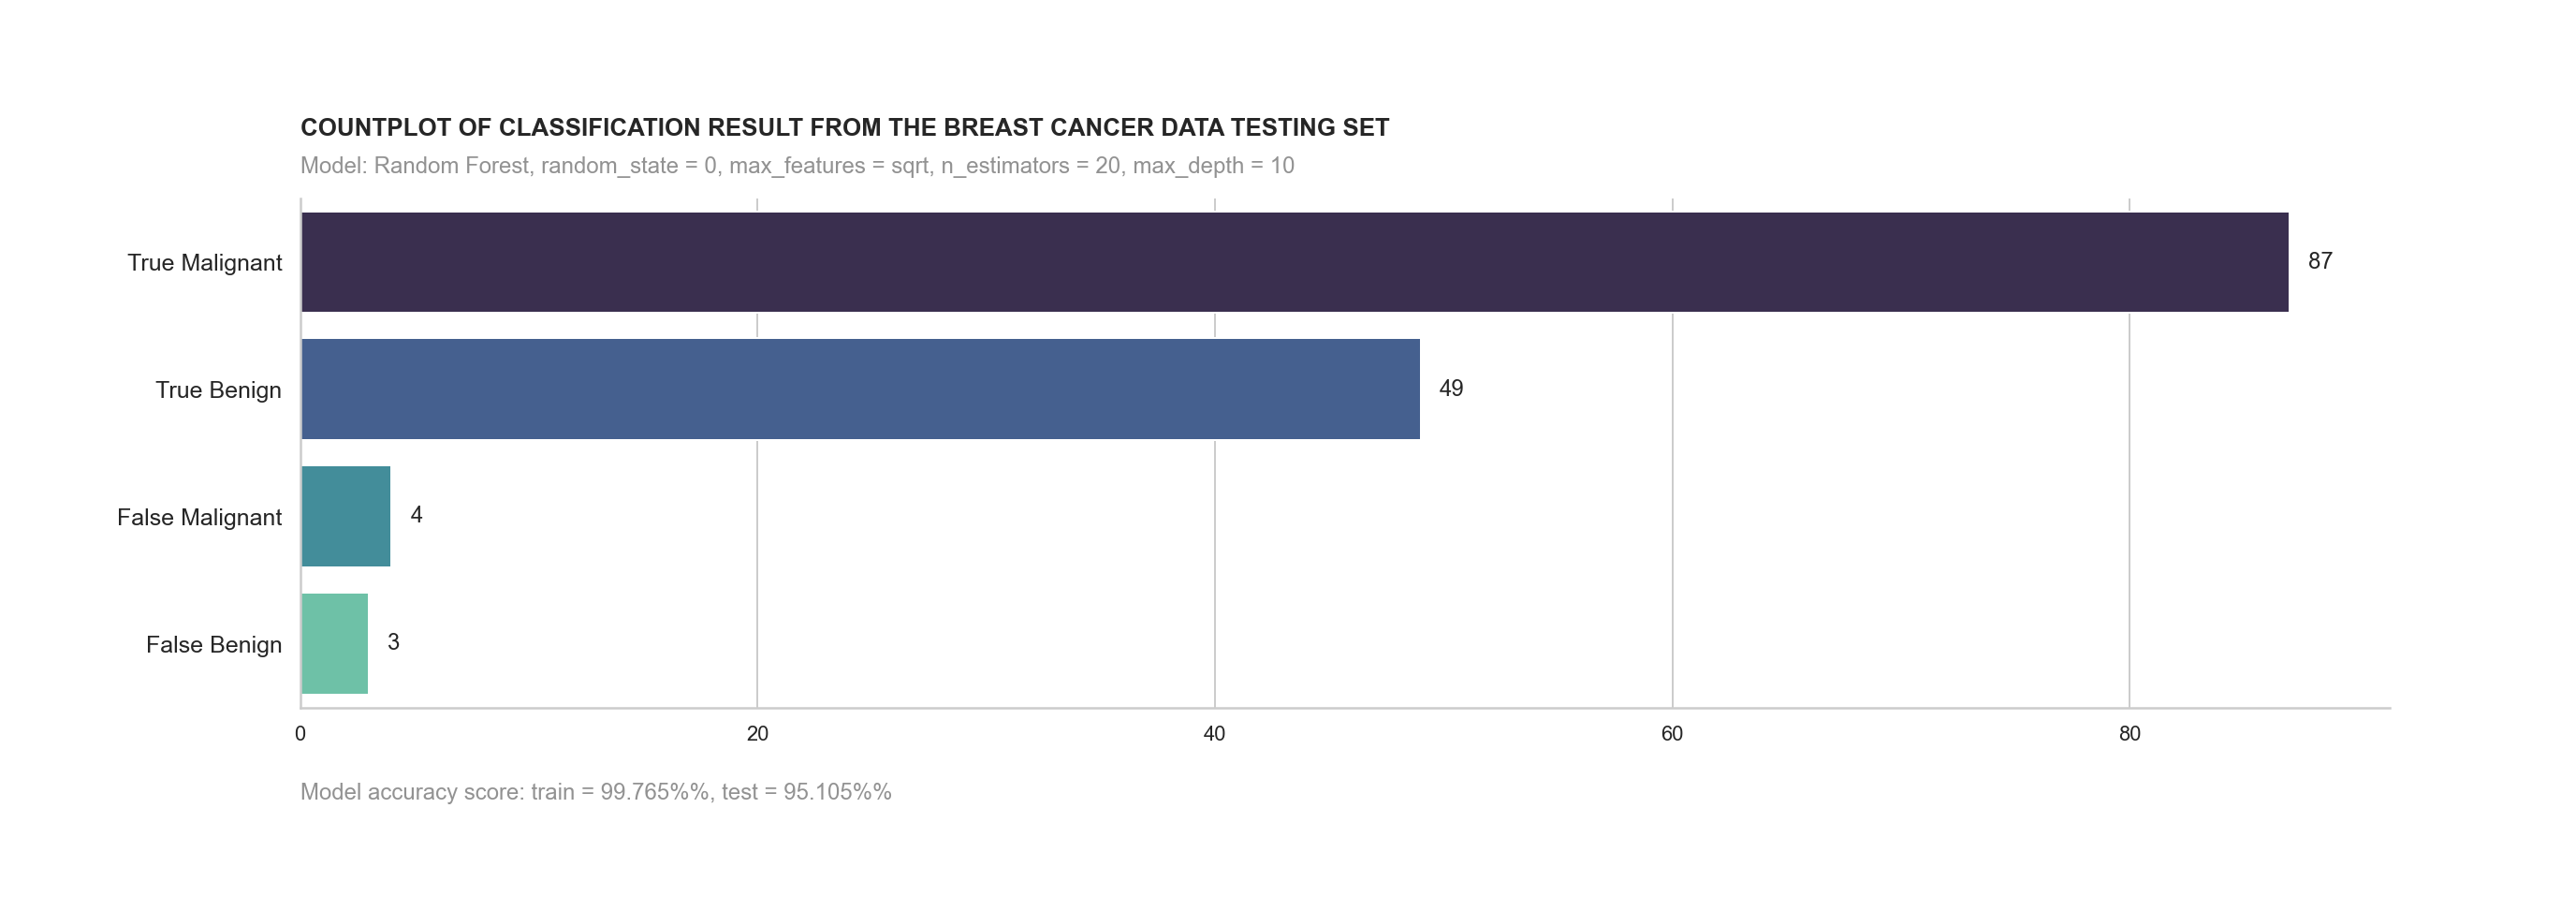

In [35]:
plot_countplot(
    data = df_breastcancer_predictedvstrue_rforestclf,
    y = 'classification',
    title = 'Countplot of classification result from the breast cancer data testing set',
    subtitle = 'Model: Random Forest, random_state = 0, max_features = sqrt, n_estimators = 20, max_depth = 10',
    description = f'Model accuracy score: train = {get_trainingset_score(model = model_rforestclf)[1]}%, test = {get_testingset_score(model = model_rforestclf)[1]}%'
);

Plotting feature importance

In [48]:
df_breastcancer_rforestclf_feature_importance = (
    pd.DataFrame(
        columns = var_X.columns,
        data = model_rforestclf.feature_importances_.reshape(1,-1))
        .T.reset_index()
        .rename(columns = {'index': 'feature_name', 0: 'feature_importance'}))

df_breastcancer_rforestclf_feature_importance.head()

,feature_name,feature_importance
0,mean radius,0.008132
1,mean texture,0.019383
2,mean perimeter,0.019271
3,mean area,0.042593
4,mean smoothness,0.005594


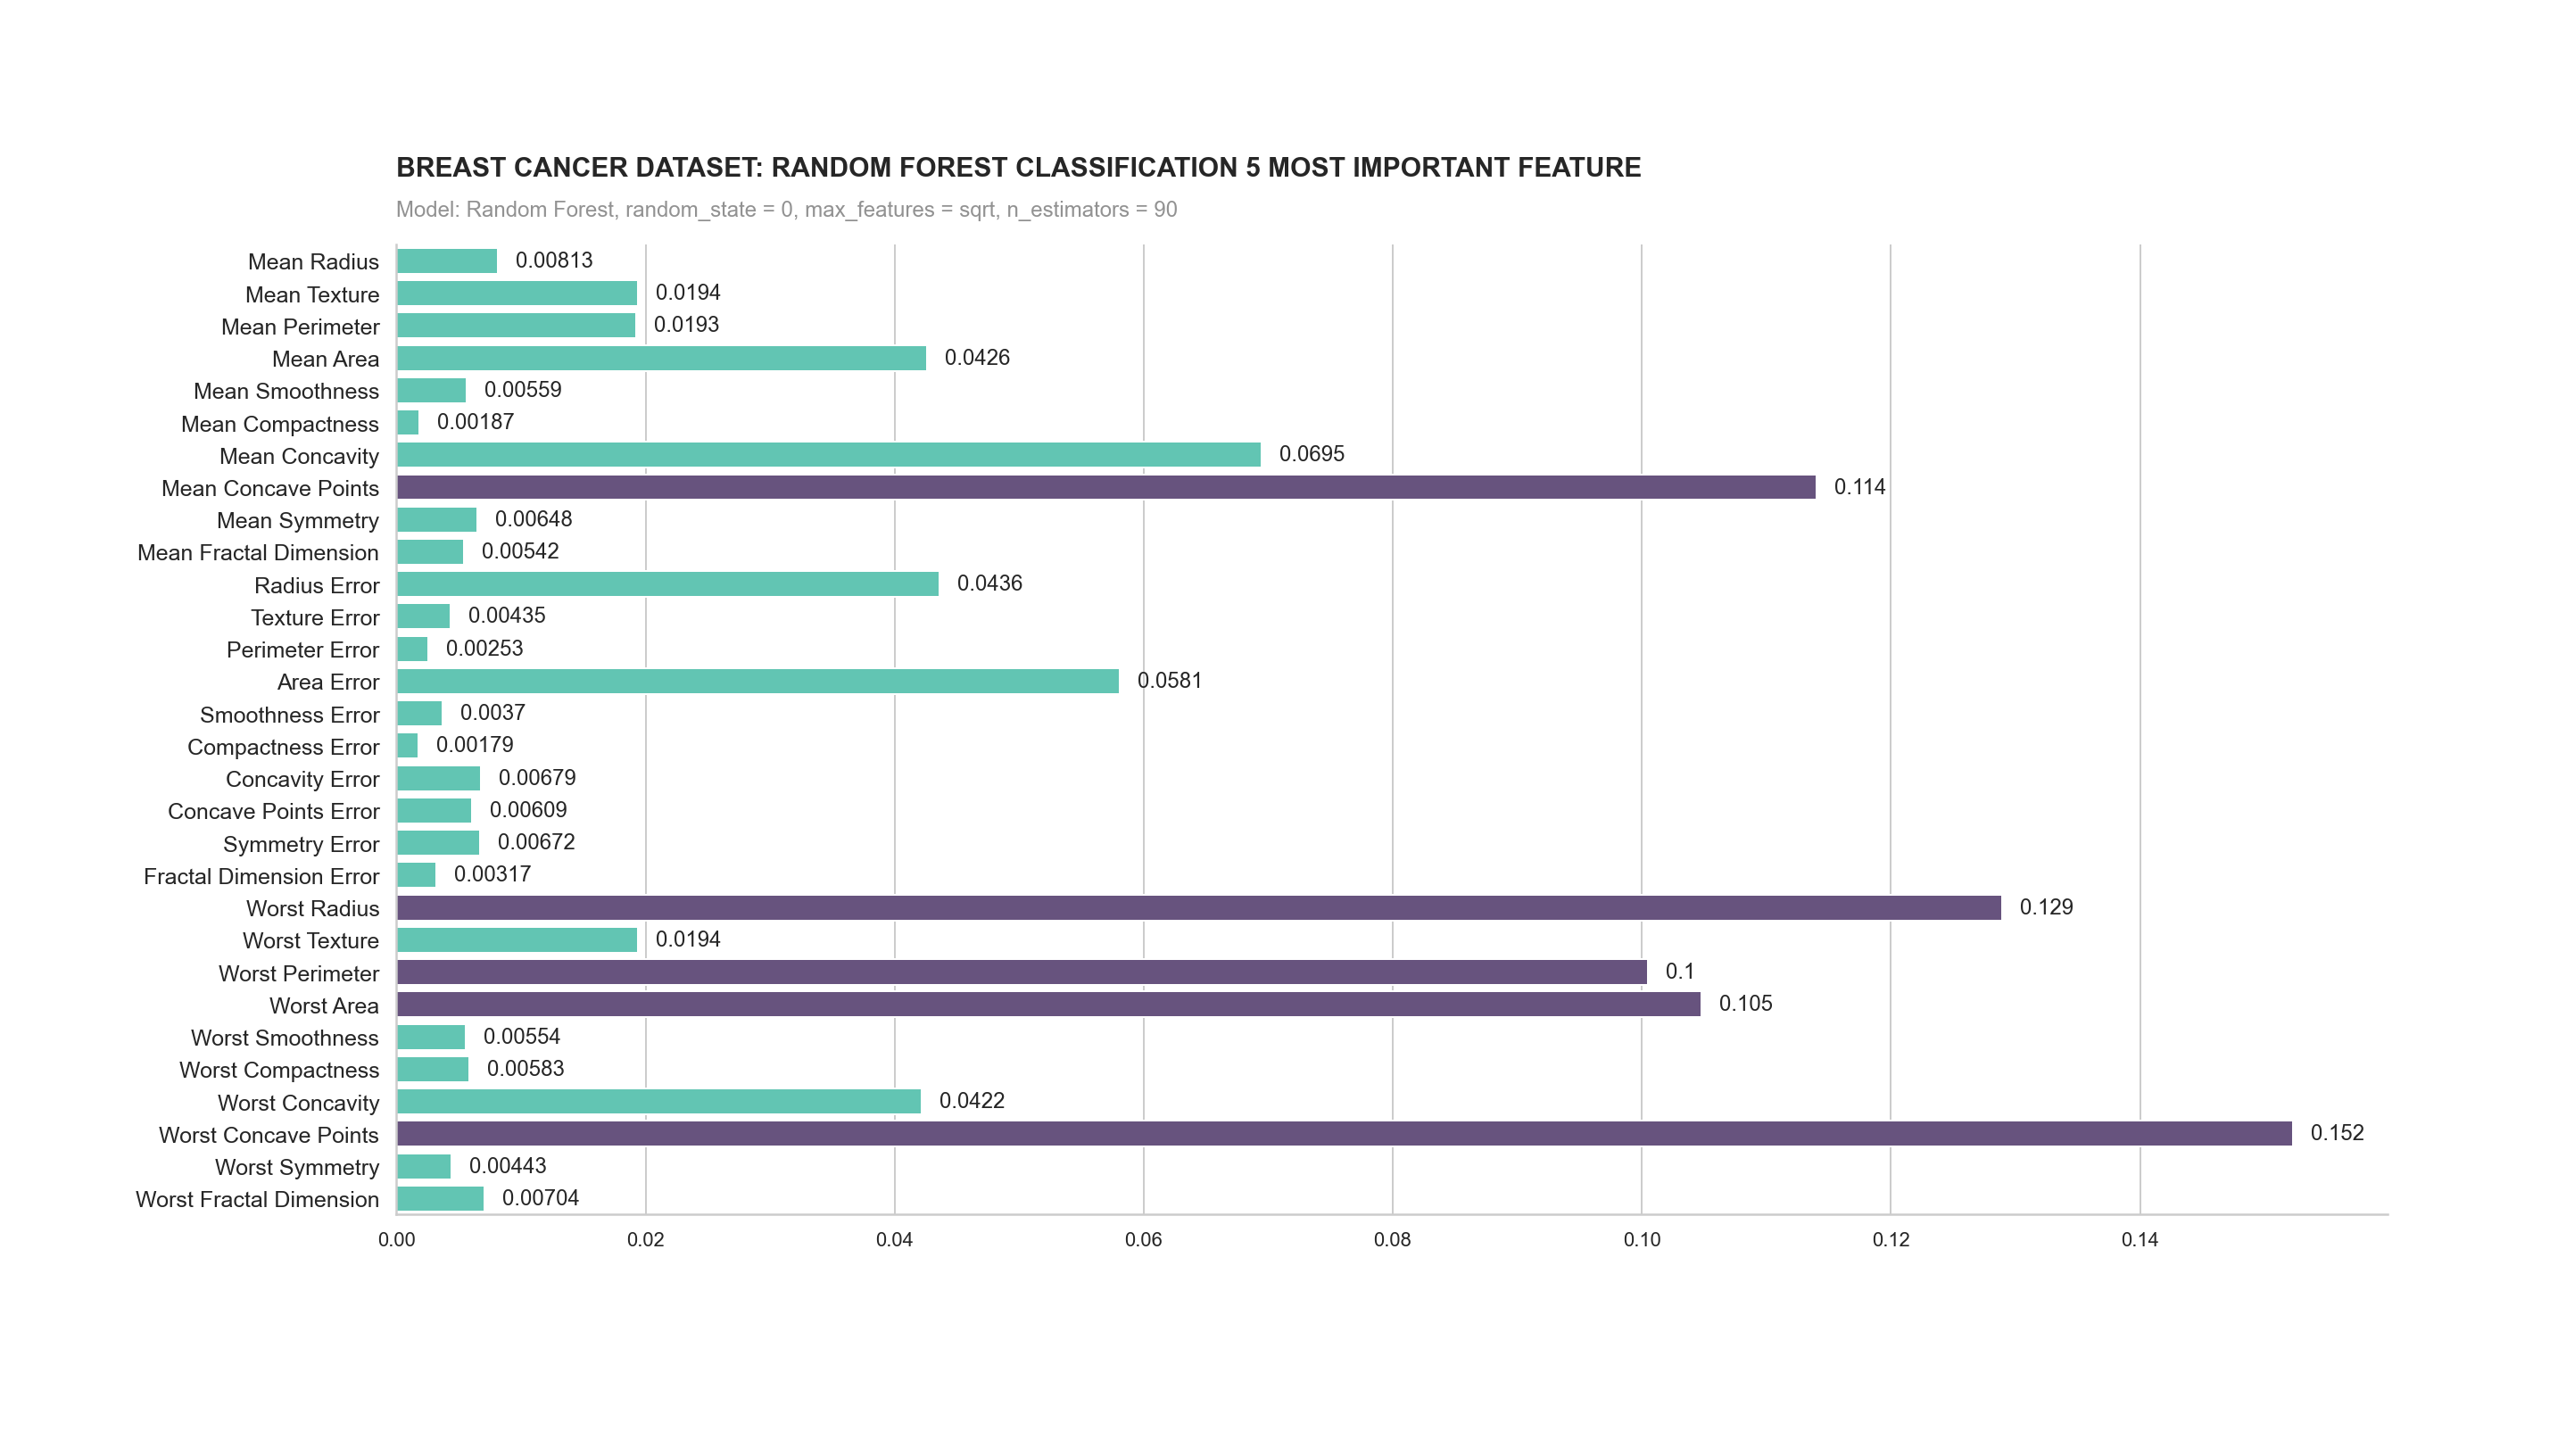

In [49]:
n_largest = 5

sns.set(style = 'whitegrid', rc = {'figure.figsize' : (20, 10)})

g = sns.barplot(
    data = df_breastcancer_rforestclf_feature_importance,
    y = 'feature_name', x = 'feature_importance',
    palette = [
        color_a1 if x == True else color_a3 
        for x in (
            df_breastcancer_rforestclf_feature_importance['feature_importance']
            .isin(df_breastcancer_rforestclf_feature_importance['feature_importance']
            .nlargest(n_largest)))], )

g.set_xlabel("".join([(' '), ('\n'*7)]))
g.set_ylabel("".join([(' '), ('\n'*4)]))

g.set_yticklabels(
    [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
    fontdict = dict(fontsize = 12.5, fontweight = 'medium'), )

g.set_title(
    "".join([(' '), ('\n'*5), (f'Breast Cancer Dataset: Random Forest Classification {n_largest} Most Important Feature'), ('\n'*2)]).upper(),
    loc = 'left', fontdict = dict(fontsize = 15,fontweight = 'bold'), )

plt.text(
    s = f'Model: Random Forest, random_state = 0, max_features = sqrt, n_estimators = 90',
    x = 0, y = 1.03, alpha = 0.5,
    horizontalalignment = 'left', transform = g.transAxes, )

g.bar_label(container = g.containers[0], padding = 10, fmt = '%.3g')

plt.text(
    s = ' ', x = 1.08, y = 1,
    transform = g.transAxes, )

sns.despine()

## Support vector machine

Training the model

In [50]:
pipe_model_svm = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('model', SVC(C = 1)), ])

In [39]:
model_svm = pipe_model_svm.fit(var_X_train, var_y_train)

### Current model parameter and statistics

In [40]:
# Getting current model parameters and their values
model_svm.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', SVC(C=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(C=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

Training set score

In [41]:
get_trainingset_score(model = model_svm)[2]

'Training set score: 99.296%'

Testing set score

In [42]:
get_testingset_score(model = model_svm)[2]

'Testing set score: 95.804%'

### Plotting classification result

Making a dataframe of actual value vs predicted value comparison

In [43]:
df_breastcancer_predictedvstrue_svm = make_df_predictedvstrue(model = model_svm)
df_breastcancer_predictedvstrue_svm

,actual_value,predicted_value,classification
532,1,1,true malignant
517,0,0,true benign
492,0,0,true benign
459,1,1,true malignant
274,0,0,true benign
...,...,...,...
400,0,0,true benign
295,1,1,true malignant
132,0,0,true benign
296,1,1,true malignant


Plotting countplot result of classification

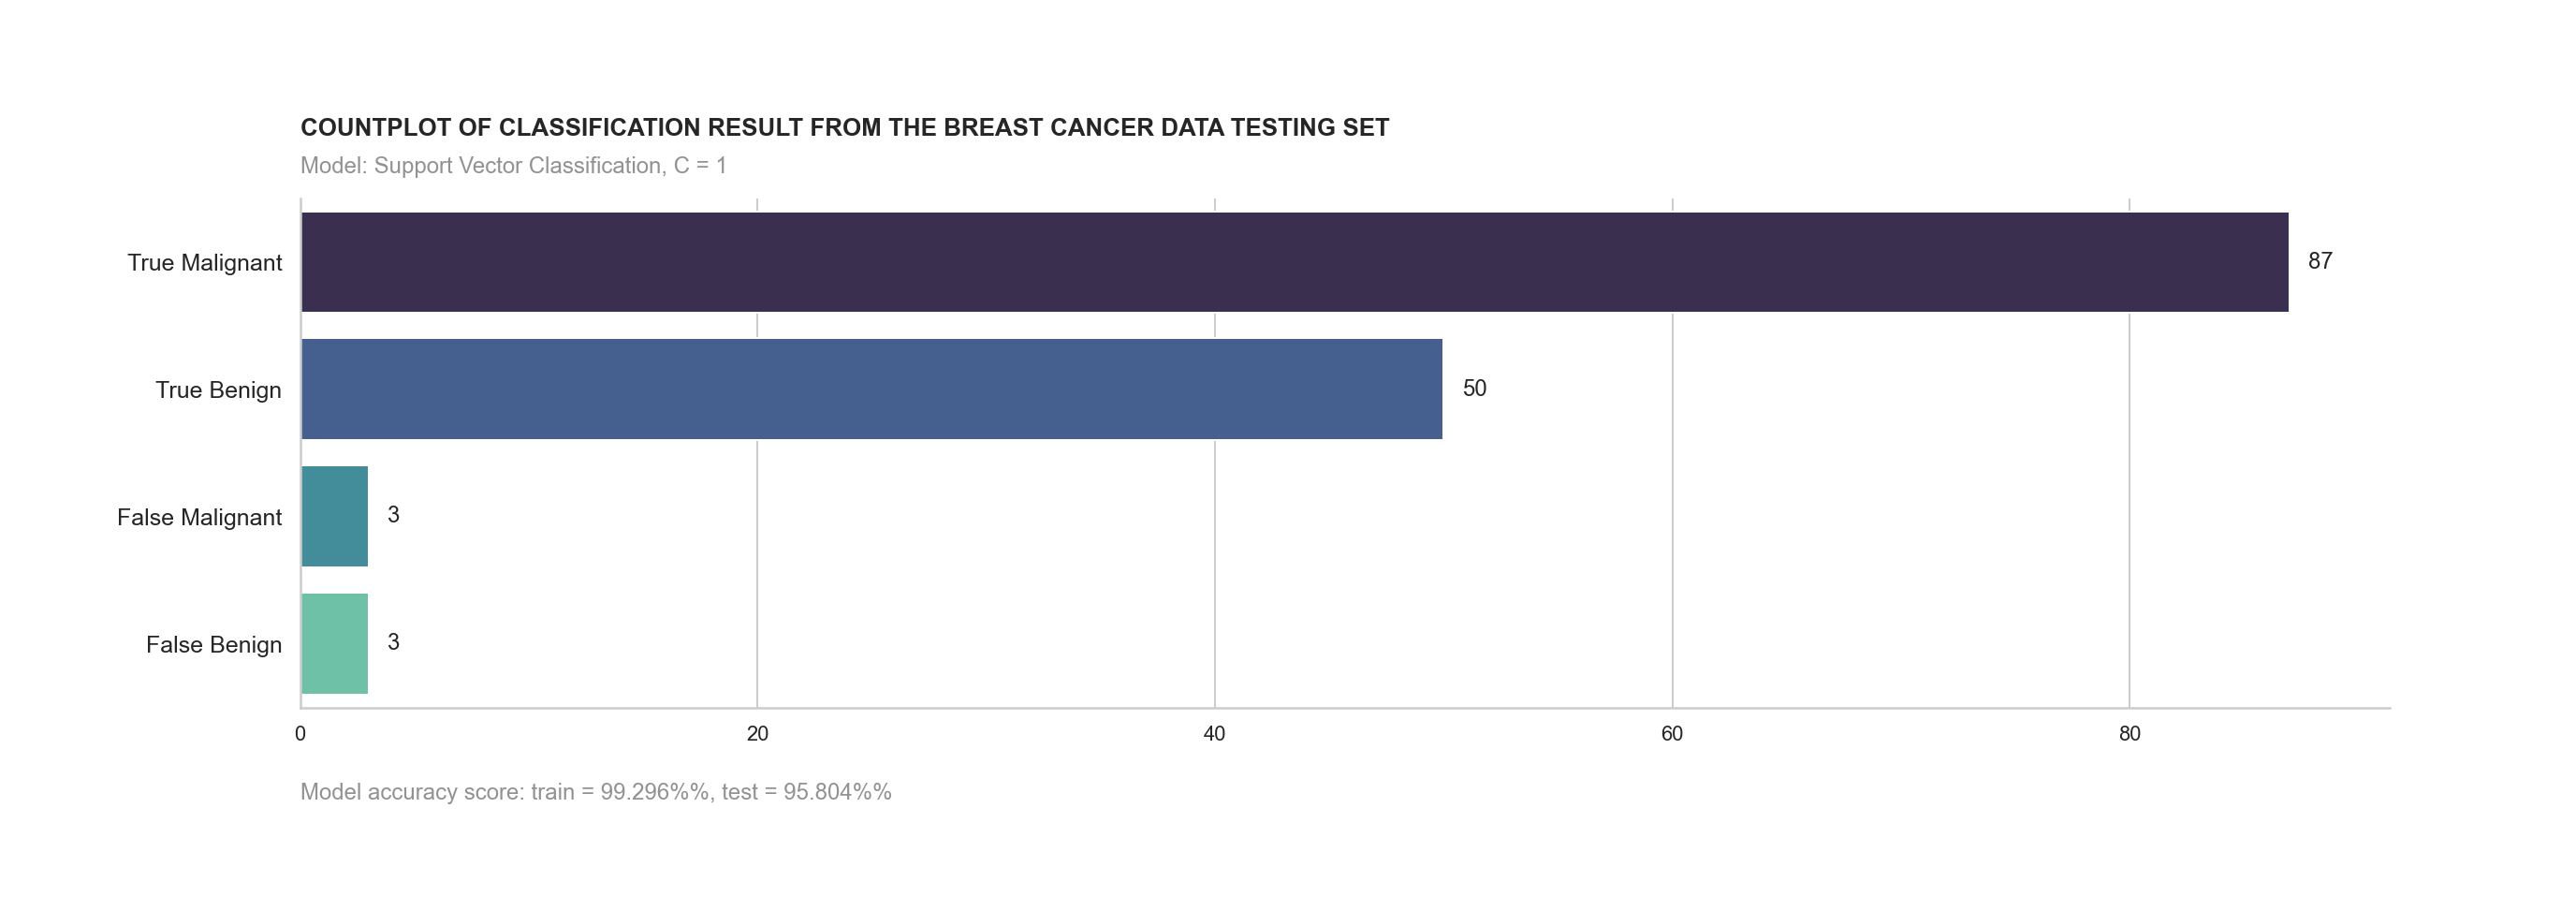

In [44]:
plot_countplot(
    data = df_breastcancer_predictedvstrue_svm,
    y = 'classification',
    title = 'Countplot of classification result from the breast cancer data testing set',
    subtitle = 'Model: Support Vector Classification, C = 1',
    description = f'Model accuracy score: train = {get_trainingset_score(model = model_svm)[1]}%, test = {get_testingset_score(model = model_svm)[1]}%'
);